#### This jupyter notebook is used to annotate each state identified from Example1-comparing-clustering-annotation.ipynb using the distribution of drug concentrations.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
import scipy 
import scipy.stats as ss
import statsmodels
from statsmodels import stats
from statsmodels.stats import multitest
sys.path.append('../Script/')
import FM_States
import FM_selection
import Annotation_external
#from FM_States import *
import rpy2
from rpy2.robjects.packages import importr

base = importr('base')
CC = importr('ConsensusClusterPlus')
pheatmap = importr('pheatmap')
bezier = importr('bezier')

ROOT_DIR = os.path.abspath("../")

In [2]:
para = {
    'output_dir': ROOT_DIR+"/Sample_output/Example1/",
    'input_expr_file': os.path.join(ROOT_DIR, "Sample_input/Example1/Sample1_data_MCF7_drugs_CTRP2.csv"),
    'annotation_matrix':ROOT_DIR+"/Sample_input/Example1/Sample1_data_MCF7_drugs_CTRP2_annotation.csv" ,
    'index_col' : 'sig_id'
}

In [3]:
output_dir = para['output_dir']
data_matrix_MCF7_CTRP2 = pd.read_csv(para['input_expr_file'], index_col = 'Unnamed: 0')
annotation_col_1 = pd.read_csv(output_dir+"/annotation_col.csv", index_col= 'Unnamed: 0')
colors = ['#ff8080','pink','#fdd5ac','#8895df', 'cyan'] #Define the colors for cluster annotation


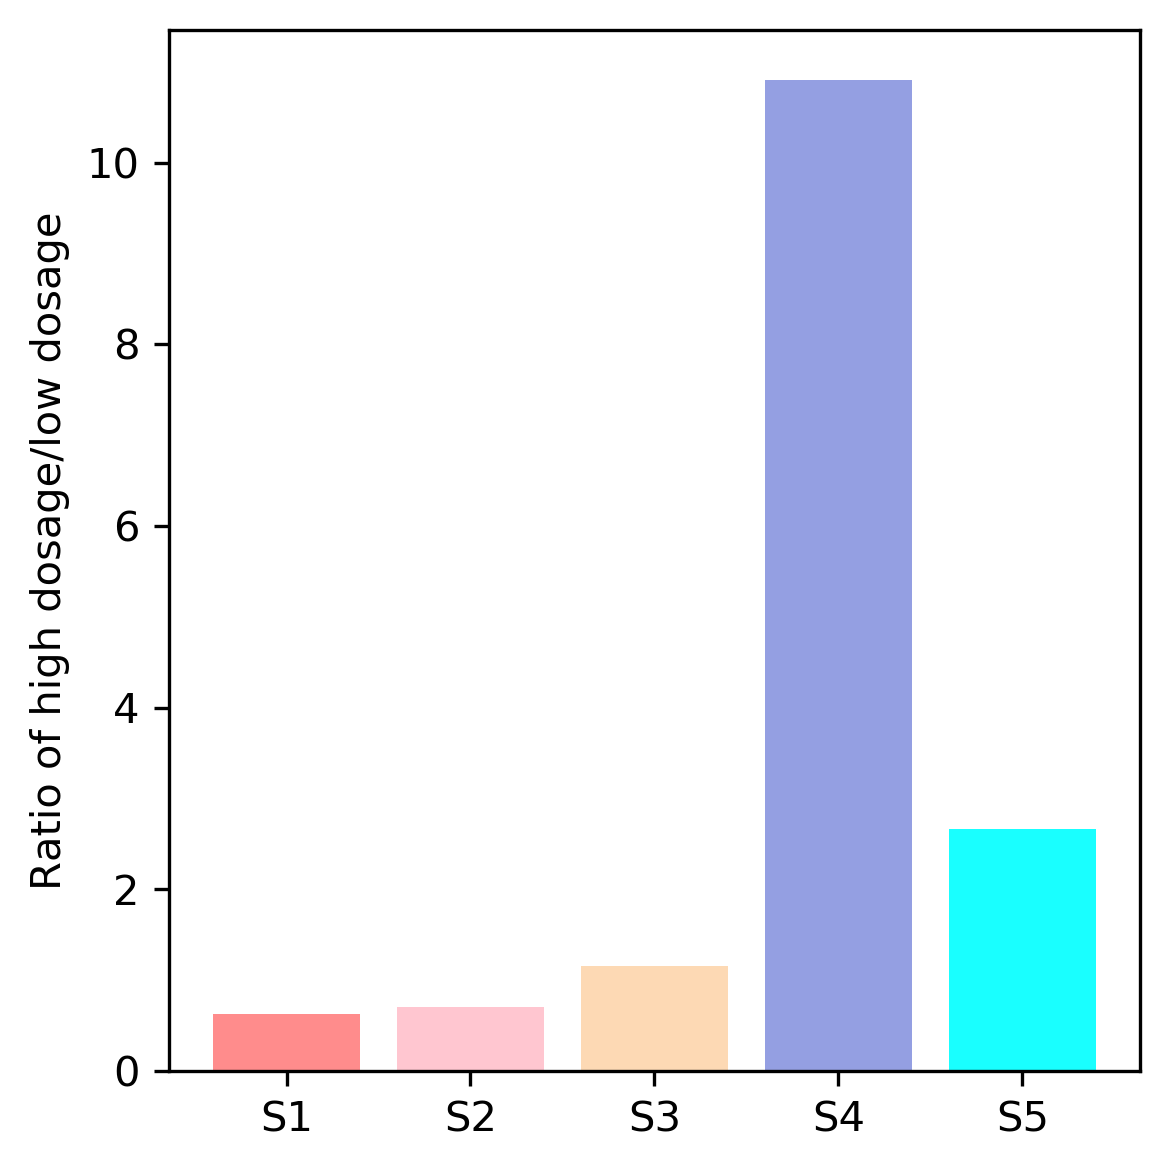

In [4]:
ylist = Annotation_external.plot_drug_dosage_annotation(annotation_col_1,colors,'MCF7', para['annotation_matrix'], para['index_col'])
states = sorted(list(set(annotation_col_1['States'])))

import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(4, 4), dpi=300, facecolor='w', edgecolor='k')
y_pos = np.arange(len(ylist))
plt.bar(y_pos,ylist, align='center', alpha=0.9,color=colors[0:len(ylist)])
plt.xticks(y_pos, states)
plt.ylabel('Ratio of high dosage/low dosage')
#plt.title('Drug Dosage')
plt.tight_layout()
plt.savefig(output_dir +'Dosage_distribution_clusters.png', dpi=300)
plt.show()


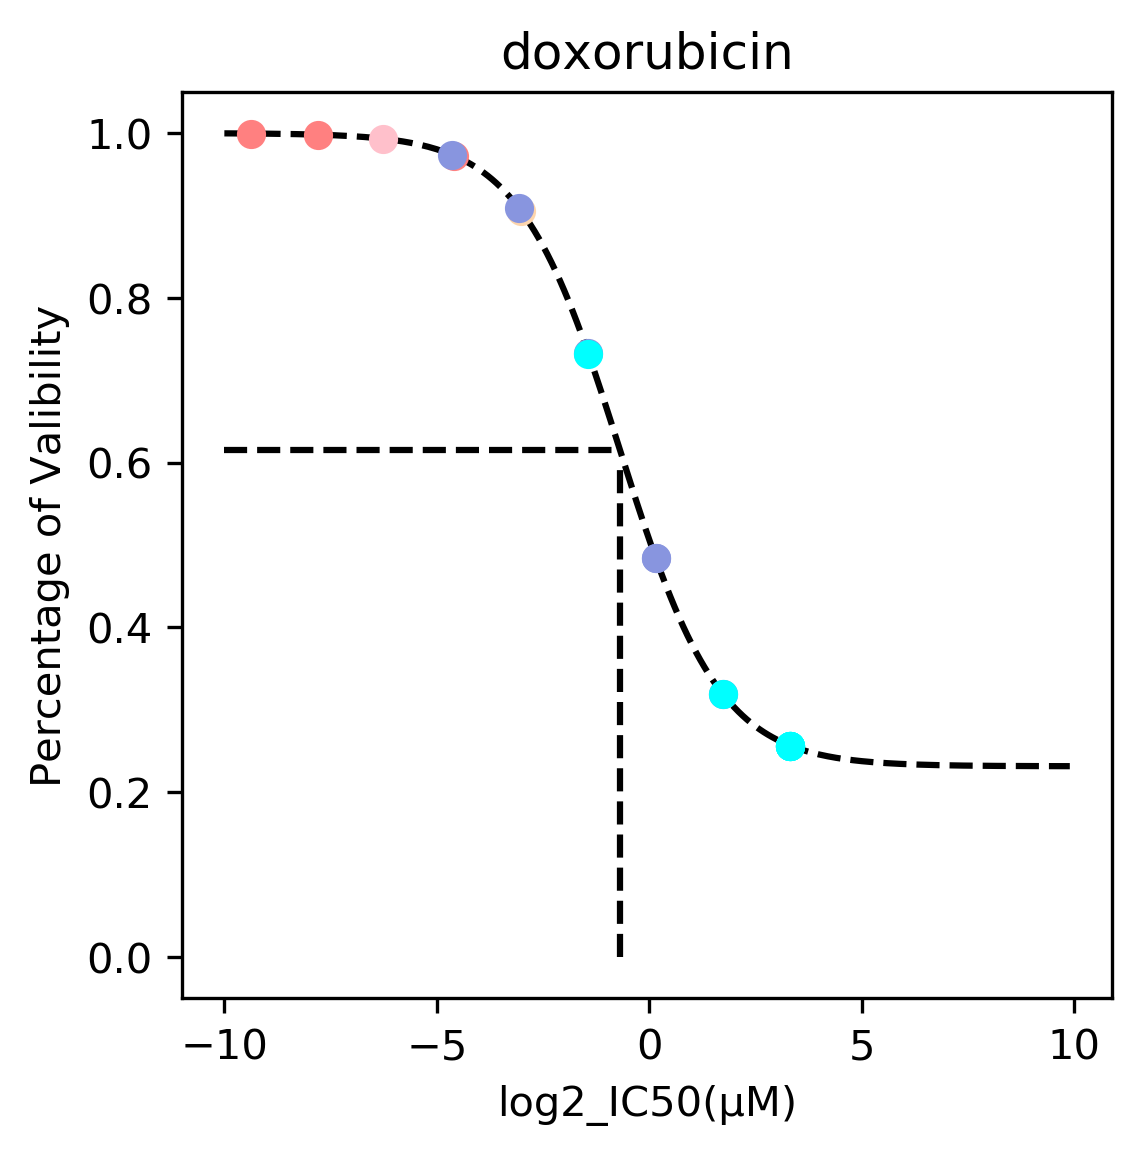

In [5]:
drug = 'doxorubicin'
meta_cll = pd.read_csv(os.path.join(ROOT_DIR,"Dataset/CTRP2/v20.meta.per_cell_line.txt"), sep= '\t')
master_ccl_id = meta_cll.loc[meta_cll['ccl_name'] == 'MCF7']['master_ccl_id'].values[0]

meta_cmp = pd.read_csv(os.path.join(ROOT_DIR,"Dataset/CTRP2/v20.meta.per_compound.txt"), sep= '\t')
master_cpd_id = meta_cmp.loc[meta_cmp['cpd_name'] == drug]['master_cpd_id'].values[0]

exp = pd.read_csv(os.path.join(ROOT_DIR,"Dataset/CTRP2/v20.meta.per_experiment.txt"), sep= '\t')
experiment_id = exp.loc[exp['master_ccl_id'] == master_ccl_id]['experiment_id'].values[0]

curve = pd.read_csv(os.path.join(ROOT_DIR, "Dataset/CTRP2/v20.data.curves_post_qc.txt"), sep = '\t')

r1 = curve.loc[curve['experiment_id'] == experiment_id]
r2 = r1.loc[r1['master_cpd_id'] == master_cpd_id]
if (len(r2) > 0):
    a = r2['p1_center'].values[0]
    b = r2['p2_slope'].values[0]
    c = r2['p3_total_decline'].values[0]
    d = r2['p4_baseline'].values[0]
    fit_num_param = r2['fit_num_param'].values[0]
    Annotation_external.drug_response_curve(drug,a,b,c,d,fit_num_param,annotation_col_1, para['annotation_matrix'],output_dir,colors)
else:
    print("Not detected!")



#### End of drug concentration annotation. For more annotation about transcriptional factors or drug targets, please check Example1_annotation_tf.ipynb and Example1_annotation_targets.